# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**\
`children` — количество детей в семье\
`days_employed` — общий трудовой стаж в днях\
`dob_years` — возраст клиента в годах\
`education` — уровень образования клиента\
`education_id` — идентификатор уровня образования\
`family_status` — семейное положение\
`family_status_id` — идентификатор семейного положения\
`gender` — пол клиента\
`income_type` — тип занятости\
`debt` — имел ли задолженность по возврату кредитов\
`total_income` — ежемесячный доход\
`purpose` — цель получения кредита

## Изучим общую информацию о данных

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #импортируем библиотеку Matplotlib для визуального отображения информации

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('/content/drive/MyDrive/data/data.csv')

**Выведем первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**В двух столбцах есть пропущенные значения. Пропуски в столбце `days_employed` мы обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**В данных встречаются артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

<div class="alert alert-danger">
<b>Комментарий ревьюера №1</b> Замечание по всему разделу ответов на вопросы
    
Гораздо рациональнее здесь воспользоваться `pivot_table()` и выводить результаты в каждом из вопросов в одной табличке.
    
Долю должников можно найти с помощью функции агрегации `mean`
    
Попробуй получить сводную следующего вида. В индексе столбец, который исследуем (в первом вопросе это количество детей), а столбцы: 'Всего кредитополучателей', 'Всего должников', 'Доля должников'. Учитывай, что использовать параметр columns не обязательно, а в параметр aggfunc можно указывать несколько функций агрегации сразу.
    
Также могу посоветовать переименовать столбцы и написать функцию для построения сводных во всех вопросах.
</div>

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:
#импорт библиотеки Matplotlib перенесен в начало кода

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> 
    
Импорт всех библиотек нужно делать в отдельной ячейке в начале всего кода, это соответствует стилевому гайду <a href="https://peps.python.org/pep-0008/">pep-8</a>
</div>

In [23]:
def category_debt_pivot(category):
    debt_pivot = data.pivot_table(index=[category],
                                  values='debt',
                                  aggfunc=['count', 'sum', 'mean']).reset_index()
    debt_pivot.rename(columns={'count': 'Всего кредитополучателей',
                               'sum': 'Всего должников',
                               'mean': 'Доля должников',
                               'debt': ''}, inplace=True)
    return debt_pivot


category_debt_pivot('children')

# Напишем функцию которая считает 'Всего кредитополучателей', 'Всего должников', 'Доля должников' для заданного столбца

,children,Всего кредитополучателей,Всего должников,Доля должников
,,,,
0,0,14107,1063,0.075353
1,1,4809,444,0.092327
2,2,2052,194,0.094542
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


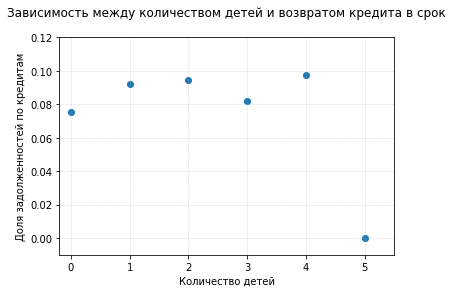

In [24]:
plt.scatter(category_debt_pivot('children')['children'], 
            category_debt_pivot('children')['Доля должников'])
plt.grid(linestyle=':', linewidth=0.5)
plt.gca().set(
              xlim=(-0.2, 5.5), ylim=(-0.01, 0.12),
              xlabel='Количество детей', 
              ylabel='Доля задолженностей по кредитам',
              title='Зависимость между количеством детей' 
              ' и возвратом кредита в срок\n'
              )
plt.show()

#zorder=2 ставил так как у меня grid поверх кружков был, хотел так исправить)

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> 
    
`zorder` отвечает за порядок наложения линий, он здесь не нужен
</div>

**Вывод:** На основании полученных результатов с увеличением количества детей доля имевших задолженность по кредиту возрастает. Доля задолженностей по кредитам у клиентов с 3-я детьми немного выбивается из общей тенденции как и с 5-ю, возможно влияет сравнительно небольшое количество клиентов с 3-я, 4-я и 5-ю детьми в данной выборке.Также можно предположить что клиенты с 3-я, 4-я и 5-ю сами по себе реже обращаются за кредитами или таких заемщиков просто меньше чем в других группах, а заемщики без детей берут кредит чаще всего.
Рост количества задолженностей с увеличение количества детей у клиентов скорее всего связан с тем, что клиенты предпочитают допустить просрочку по выплате кредита чем  сэкономить на содержании детей.

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Хороший вывод
</div>

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [25]:
category_debt_pivot('family_status') # Воспользуемся функцией category_debt_pivot для построения сводной таблицы

,family_status,Всего кредитополучателей,Всего должников,Доля должников
,,,,
0,Не женат / не замужем,2796,273,0.097639
1,в разводе,1189,84,0.070648
2,вдовец / вдова,951,63,0.066246
3,гражданский брак,4146,385,0.092861
4,женат / замужем,12266,927,0.075575


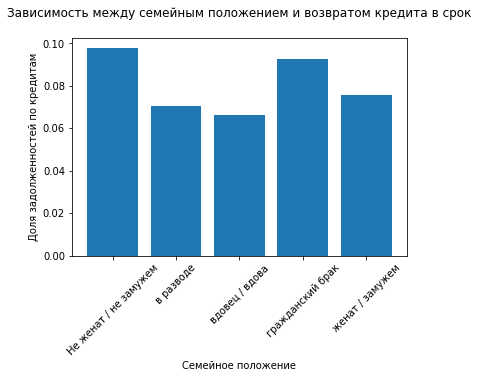

In [26]:
plt.bar(category_debt_pivot('family_status')['family_status'], 
        category_debt_pivot('family_status')['Доля должников'])
plt.gca().set(
              xlabel='Семейное положение', 
              ylabel='Доля задолженностей по кредитам',
              title='Зависимость между семейным положением' 
              ' и возвратом кредита в срок\n'
              )
plt.xticks(rotation=45) #изменил наклон с 90 на 45
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Мне больше нравится, когда подписи расположены под углом 45 или 30 градусов. Так удобнее читать, и меньше места они занимают
</div>

Требуется уточнение насколько точно заемщики делятся по данным категориям, так как статус "Не женат/не замужем", "гражданский брак" ,"в разводе" и "вдовец/вдова" означает что человек в текущий момент не состоит в законных отношениях. Проверим данную гипотезу объеденив эти группы и сравним с группой 'женат/замужем'

In [27]:
# Убрал все подсчеты количества и доли должников, свел все в сводную таблицу

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> 
    
Вместо `.value_counts().sum()` лучше использовать `.count()` или `len()`
</div>

In [225]:
category_debt_pivot_family_status = category_debt_pivot(data['family_status'] == 'женат / замужем')
category_debt_pivot_family_status['family_status'] = \
    category_debt_pivot_family_status['family_status'].map({False: 'Не женат / не замужем', True: 'Женат / замужем'}) 
category_debt_pivot_family_status
# Воспользовался функцией category_debt_pivot для проверки доли должников 'Женат/замужем' / 'Не женат/не замужем'
# Переименовал строки для информативного отображения в таблице и на гистограмме

,family_status,Всего кредитополучателей,Всего должников,Доля должников
,,,,
0,Не женат / не замужем,9082,805,0.088637
1,Женат / замужем,12266,927,0.075575


Количество клиентов находящихся в браке больше, но размер групп примерно сопоставим

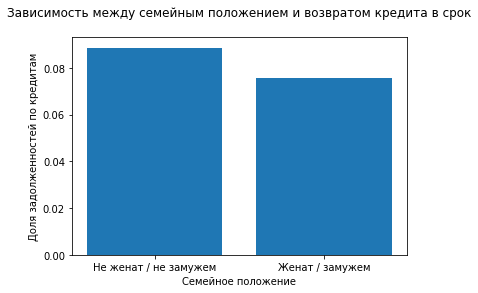

In [226]:
plt.bar(category_debt_pivot_family_status['family_status'], 
        category_debt_pivot_family_status['Доля должников'])
plt.gca().set(
              xlabel='Семейное положение', 
              ylabel='Доля задолженностей по кредитам',
              title='Зависимость между семейным положением' 
              ' и возвратом кредита в срок\n'
              )
plt.show() #Добавил гистограмму

**Вывод:** Судя по полученным данным, те заемщики которые не были женаты или находятся в гражданском браке, чаще имеют проблемы с выплатой по кредиты. А клиенты имеющие семейное положение 'женат/замужем' реже имеют проблемы с выплатой кредита в срок.

Клиенты находящиеся в законных отношениях являются более надежными заемщиками.

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Согласна
</div>

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [227]:
data['total_income_category'].value_counts() # Посмотрим распределение клиентов по ранее созданным группам ежемесяного дохода

C    15938
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

Большая часть клиентов попали в группу 'С' часть попали в группу 'B' в остальные группы попало небольшое количество клиентов, что может исказить результаты исследования. Сгруппируем клиентов по группам так чтобы их количество в каждой группе было примерно одинаково. И увеличим количество групп для увеличения разрешения, так при новой группировке интервалы дохода могут сильно измениться.

In [228]:
data['total_income_new_category'] = pd.qcut(data['total_income'], q=8, labels=['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])
# Совместил поиск интервалов с помощью qcut и именование категорий с созданием нового столбца

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> 
    
Можно было сделать проще 
    
    data['total_income_new_category'] = pd.qcut(data['total_income'], q=8, labels=['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']) 
</div>

In [229]:
category_debt_pivot('total_income_new_category') 
# Проверяем распределение по группам и считаем долю должников в сводной таблице с помощью функции

,total_income_new_category,Всего кредитополучателей,Всего должников,Доля должников
,,,,
0,H,2669,206,0.077182
1,G,2668,221,0.082834
2,F,2669,233,0.087299
3,E,2792,247,0.088467
4,D,2544,223,0.087657
5,C,2669,221,0.082803
6,B,2668,196,0.073463
7,A,2669,185,0.069314


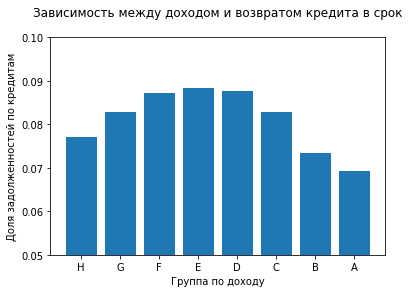

In [230]:
plt.bar(category_debt_pivot('total_income_new_category')['total_income_new_category'], 
        category_debt_pivot('total_income_new_category')['Доля должников'])
plt.gca().set(ylim=(0.05, 0.10),
              xlabel='Группа по доходу', 
              ylabel='Доля задолженностей по кредитам',
              title='Зависимость между доходом' 
              ' и возвратом кредита в срок\n')
plt.show()

**Вывод:** Исследовав зависимость между месячным доходом и имел ли задолженность клиент по возврату кредитов наблюдается рост доли задолженостей вместе с ростом ежемесячного дохода примерно до уровня в 142000. Далее происходит снижение доли задолженностей до минимального значения для клиентов с доходом свыше 254000.
Таким образом более надежные клиенты находятся по краям диапазона доходов менее 83000 и свыше 200000, а самые ненадежные в его середине от 107000 до 166000.

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
👍
</div>

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [231]:
category_debt_pivot('purpose_category') 
# Проверяем распределение по по целям кредита и считаем долю должников в сводной таблице с помощью функции

,purpose_category,Всего кредитополучателей,Всего должников,Доля должников
,,,,
0,операции с автомобилем,4281,400,0.093436
1,операции с недвижимостью,10754,780,0.072531
2,получение образования,3989,369,0.092504
3,проведение свадьбы,2324,183,0.078744


Чаще всего клиенты берут кредит на недвижимость. Операции с автомобилем и образование примерно одинаковы по популярности и реже всего берут кредит на проведение свадьбы.

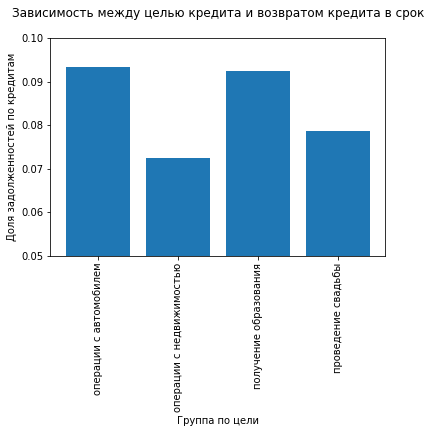

In [232]:
plt.bar(category_debt_pivot('purpose_category')['purpose_category'], 
        category_debt_pivot('purpose_category')['Доля должников'])
plt.gca().set(ylim=(0.05, 0.10),
              xlabel='Группа по цели', 
              ylabel='Доля задолженностей по кредитам',
              title='Зависимость между целью кредита' 
              ' и возвратом кредита в срок\n')
plt.xticks(rotation=90)
plt.show()

**Вывод:** Чаще всего клиенты задерживают выплаты по кредитам взятых с целями: операции с автомобилем и получение образования. Реже на проведение свадьбы и и операции с недвижимостью.
Можно предположить что полученненные результаты в категориях операции с недвижимостью и операции с автомобилем, показывают что  клиенты меньше допускают просрочек с выплатой по кредитам для цели операции с недвижимостью чем с целью операции с автомобилем возможно из-за того, что в этих категориях часто кредит выдается или под залог цели кредита или до выплаты кредита, банк является владельцем цели кредита.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* Пропуски в исходных данных были выявлены в двух столбцах days_employed и total_income причем в одинаковом количестве. Возможно total_income и days_employed считается по формуле и зависят друг от друга, и если отсутствует(или не предоставлен клиентом) одно значение, то второе тоже будет не определено.

Добавил:
Также данная проблема могла возникнуть на этапе выгрузки данных, из-за неправильного запроса или при объединении таблиц, в которых отсутствовали столбцы с пропущенными значениями и автоматически были заполнены NaN.

<div class="alert alert-danger">
<b>Комментарий ревьюера №1</b> 
    
Не нужно забывать, что проблемы могли возникнуть и на этапе выгрузки данных. Неправильный запрос, объединение таблиц также может быть причиной. 
</div>

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Медианное значение для количественных переменных не чувствительно к выбросам (как среднее арифметическое) и в целом отражает середину значений в ряду данных. При отсутствии возможности восстановить данные, медианное значение лучше всего подходит для замены отсутствующих значений

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Да, смотрим на наличие выбросов👍
</div>

## Общий вывод.

На основании полученных результатов по исследованию статистики платежеспособности клиентов можно сделать вывод о том, что самыми надежными заемщиками являются клиенты без детей, находящиеся в законных отношениях, с доходом свыше 200000, цель кредита которых являются операции с недвижимостью.

В противоположность  к ним по результатам исследования самыми ненадежными клиентами являются



<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Здорово, что описал портрет "идеального" клиента! Также можно добавить рекомендации банку-заказчику, описать портрет наиболее рискованного клиента.
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
    
В целом, работа хорошая. У тебя отличные аналитические навыки, но остались небольшие доработки. Доделывай и присылай на повторную проверку.
        
Жду твоих исправлений 😊
</font></b>
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
Отлично! Критических замечаний больше нет. Проект принят! 👏 Поздравляю и желаю удачи!
</font></b>
</div>